# Gewinnung von Gold aus Erz

Es ist notwendig, einen Prototyp eines maschinellen Lernmodells vorzubereiten, das die Gewinnungsrate von Gold aus Golderz vorhersagen soll. Verwenden Sie Daten mit Bergbau- und Reinigungsparametern.

Das Modell wird dazu beitragen, die Produktion zu optimieren, um kein Unternehmen mit unrentablen Eigenschaften zu gründen.

Notwendig:

* die Daten vorzubereiten;
* eine explorative Analyse der Daten durchzuführen;
* eine benutzerdefinierte Metrik erstellen;
* die optimalen Hyperparameter auszuwählen;
* das Modell erstellen und trainieren.

## Datenexploration

In [1]:
# Wir importieren die notwendigen Bibliotheken.
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import GridSearchCV

from scipy import stats as st

In [2]:
# Wir laden Tabellen mit Daten
df_train = pd.read_csv('C:/Users/Konstantin/Documents/datasets/Gold Recovery/gold_recovery_train_new.csv')
df_test = pd.read_csv('C:/Users/Konstantin/Documents/datasets/Gold Recovery/gold_recovery_test_new.csv')
df_full = pd.read_csv('C:/Users/Konstantin/Documents/datasets/Gold Recovery/gold_recovery_full_new.csv')

In [3]:
# Wir werden die erhaltenen Daten studieren
datas = [df_train, df_test, df_full]
for file in datas:
    display(file.info())
    display(file.shape)
    display(file.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

None

(14149, 87)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

None

(5290, 53)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

None

(19439, 87)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# Aufgrund der Tatsache, dass die Daten in benachbarten Zeilen einen ähnlichen Wert haben, 
# füllen wir die Nulldaten mit Werten aus benachbarten Zeilen aus.
for file in datas:
    file.ffill(axis = 0, inplace = True)
    display(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant             

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19439 non-null float64
final.output.concentrate_pb                           19439 non-null float64
final.output.concentrate_sol                          19439 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19439 non-null float64
final.output.tail_pb                                  19439 non-null float64
final.output.tail_sol                                 19439 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19439 non-null float64
primary_cleaner.input.depressant             

None

In [5]:
# Wir berechnen die Goldanreicherungseffizienz auf dem Trainingsset.
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

rougher_output_recovery = pd.Series(C*(F-T)*100/F/(C-T))

display(df_train['rougher.output.recovery'].head())
display(rougher_output_recovery.head())

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [6]:
# Wir berechnen die durchschnittliche Effizienz der Goldanreicherung.
print('Durchschnittliche Effizienz der Goldanreicherung angegeben', df_train['rougher.output.recovery'].mean())
print('Durchschnittliche Effizienz der Goldanreicherung berechnet', rougher_output_recovery.mean())

Durchschnittliche Effizienz der Goldanreicherung angegeben 82.70450164550293
Durchschnittliche Effizienz der Goldanreicherung berechnet 82.70450164550293


In [7]:
# Wir berechnen die durchschnittliche absolute Abweichung zwischen der angegebenen und 
# der berechneten durchschnittlichen Goldeffizienz.
print('Durchschnittliche absolute Abweichung', mean_absolute_error(df_train['rougher.output.recovery'], rougher_output_recovery))

Durchschnittliche absolute Abweichung 1.1417477403204992e-14


**Schlussfolgerungen**

Wir haben eine Datenvorverarbeitung durchgeführt: Wir haben die Nullwerte mit den Daten benachbarter Zeilen ausgefüllt. Als nächstes berechneten wir die Effizienz der Goldanreicherung. Die Durchschnittswerte waren gleich. Die mittlere absolute Abweichung liegt nahe bei Null und ist höchstwahrscheinlich darauf zurückzuführen, dass Nullwerte mit ungenauen Daten ausgefüllt wurden. Daraus kann geschlossen werden, dass die mittlere absolute Abweichung in der angegebenen Tabelle korrekt berechnet wurde.

Wir sehen, dass die Testprobe nicht die Werte der Parameter enthält, die als Ergebnis der Erzaufbereitung in verschiedenen Stadien erhalten wurden, sowie die berechneten Parameter. Diese. von den vier möglichen Stufen fehlt final und von den vier Parametertypen fehlen output und calculation.

Fehlende Schilder sind das Ergebnis von Erzaufbereitungsarbeiten. Um das Modell im Trainingsgebiet zu trainieren, müssen die Spalten mit den angegebenen Features entfernt werden.

## Explorative Datenanalyse

In [8]:
# Wir werden sehen, wie sich die Konzentration von Metallen (Au, Ag, Pb) in verschiedenen Stadien der Reinigung ändert.
print('Au')
print(df_train['rougher.input.feed_au'].mean())
print(df_train['rougher.output.concentrate_au'].mean())
print(df_train['primary_cleaner.output.concentrate_au'].mean())
print(df_train['final.output.concentrate_au'].mean())
print()

print('Ag')
print(df_train['rougher.input.feed_ag'].mean())
print(df_train['rougher.output.concentrate_ag'].mean())
print(df_train['primary_cleaner.output.concentrate_ag'].mean())
print(df_train['final.output.concentrate_ag'].mean())
print()

print('Pb')
print(df_train['rougher.input.feed_pb'].mean())
print(df_train['rougher.output.concentrate_pb'].mean())
print(df_train['primary_cleaner.output.concentrate_pb'].mean())
print(df_train['final.output.concentrate_pb'].mean())
print()

Au
7.866576841919407
19.43995785143646
32.386835978391346
44.00379162105571

Ag
8.579195196596277
11.775812314356036
8.200915815165981
5.141920924857091

Pb
3.5054646776095564
7.664554751481546
9.568544006770484
10.132847758146394



**Schlussfolgerungen**

Nachdem wir die durchschnittliche Konzentration von Metallen in verschiedenen Reinigungsstufen berechnet haben, sehen wir, dass die Konzentration von Gold von Stufe zu Stufe erheblich zunimmt, die Konzentration von Silber zuerst leicht zunimmt, dann abnimmt, die Konzentration von Blei zunimmt, aber nicht signifikant.

In [9]:
# Wir untersuchen die Gesamtkonzentration aller Substanzen in verschiedenen Stadien.
print((df_train['rougher.input.feed_au']+df_train['rougher.input.feed_ag']+
       df_train['rougher.input.feed_pb']+df_train['rougher.input.feed_sol']).mean())

print((df_train['rougher.output.concentrate_au']+df_train['rougher.output.concentrate_ag']+
       df_train['rougher.output.concentrate_pb']+df_train['rougher.output.concentrate_sol']).mean())

print((df_train['primary_cleaner.output.concentrate_au']+df_train['primary_cleaner.output.concentrate_ag']+
       df_train['primary_cleaner.output.concentrate_pb']+df_train['primary_cleaner.output.concentrate_sol']).mean())

print((df_train['final.output.concentrate_au']+df_train['final.output.concentrate_ag']+
       df_train['final.output.concentrate_pb']+df_train['final.output.concentrate_sol']).mean())

56.24216956828632
67.17314539700826
60.17254606958831
68.387871746922


**Schlussfolgerungen**

Nach der Analyse der Gesamtkonzentration aller Substanzen in verschiedenen Stufen sehen wir, dass nach der ersten Reinigungsstufe die Gesamtkonzentration abnimmt, aber nach der letzten Reinigungsstufe wieder ansteigt.

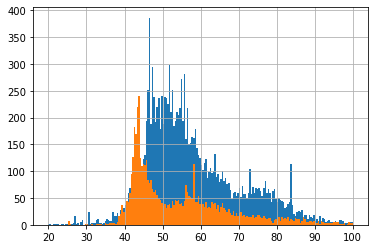

In [10]:
# Wir analysieren die Diagramme der Größenverteilung der Rohstoffkörnchen auf den Trainings- und Testmustern.
df_train['rougher.input.feed_size'].hist(bins = 200, range=(20, 100))
df_test['rougher.input.feed_size'].hist(bins = 200, range=(20, 100))

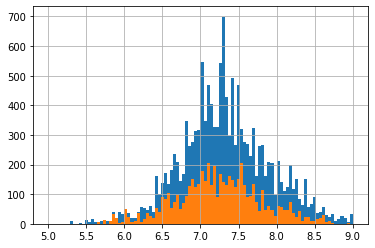

In [11]:
df_train['primary_cleaner.input.feed_size'].hist(bins = 100, range=(5, 9))
df_test['primary_cleaner.input.feed_size'].hist(bins = 100, range=(5, 9))

**Schlussfolgerungen**

Wir haben die Verteilungsdiagramme der Rohstoffgranulatgrößen an den Trainings- und Testmustern analysiert. Wir können sehen, dass der Datensatz in beiden Fällen rechtsschief ist. Die Diagramme sind ähnlich, daher unterscheiden sich die Verteilungen nicht sehr voneinander, die Schätzung des Modells wird korrekt sein.

## Modelltraining und Testen

In [12]:
# Wir erstellen eine smape-Berechnungsfunktion.
def smape(target, predict): 
    return (100/len(target)) * np.sum(2 * np.abs(target - predict) / (np.abs(target) + np.abs(predict)))

# Wir werden unsere eigene Metrik erstellen.
smape_scorer = make_scorer(smape, greater_is_better=True)

In [13]:
# Wir vervollständigen die Testtabelle mit den fehlenden Zielparametern rougher.output.recovery und final.output.recovery.
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery','final.output.recovery']], on='date')
df_test.info()

# Wir werden die Spalten, die sich im Test befinden, in der Trainingsstichprobe belassen.
df_train = df_train[df_test.columns]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [14]:
# Wir werden Samples für den Zielparameter rougher.output.recovery generieren.
features_1 = df_train.loc[:, 'rougher.input.feed_ag': 'rougher.state.floatbank10_f_level']
target_1 = df_train['rougher.output.recovery']

In [21]:
# Wir finden die besten Hyperparameter für das Modell DecisionTreeRegressor.
model = DecisionTreeRegressor()
parameters = {'max_depth':[9,10,11,12,13,14,15,25]}
 
grid = GridSearchCV(model, parameters, cv = 5, scoring = smape_scorer)
grid.fit(features_1, target_1)

grid.best_params_

{'max_depth': 13}

In [22]:
# Wir finden die besten Hyperparameter für das Modell RandomForestRegressor.
model = RandomForestRegressor()

parametrs = { 'n_estimators': range (30, 51, 10),
              'max_depth': range (9,13, 2) }

grid = GridSearchCV(model, parametrs, cv=5, scoring = smape_scorer)
grid.fit(features_1, target_1)

grid.best_params_

C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: Dep

{'max_depth': 11, 'n_estimators': 40}

In [23]:
# Wir finden die besten Hyperparameter für das Modell LinearRegression.
model = LinearRegression()
parametrs = {'fit_intercept' : [True, False], 'copy_X': [True, False], 'n_jobs' :[None, -1]}

grid = GridSearchCV(estimator = model, param_grid = parametrs, cv = 5, scoring = smape_scorer)
grid.fit(features_1, target_1)

grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None}

In [24]:
# Wir werden Stichproben für den Zielparameter final.output.recovery generieren.
features_2 = df_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_2 = df_train['final.output.recovery']

In [25]:
# Wir finden die besten Hyperparameter für das Modell DecisionTreeRegressor.
model = DecisionTreeRegressor()
parameters = {'max_depth':[160,161,162,163,164]}
 
grid = GridSearchCV(model, parameters, cv = 5, scoring = smape_scorer)
grid.fit(features_2, target_2)

grid.best_params_

{'max_depth': 161}

In [26]:
# Wir finden die besten Hyperparameter für das Modell RandomForestRegressor.
model = RandomForestRegressor()

parametrs = { 'n_estimators': range (10, 31, 10),
              'max_depth': range (5,11, 2) }

grid = GridSearchCV(model, parametrs, cv=5, scoring = smape_scorer)
grid.fit(features_2, target_2)

grid.best_params_

C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: Dep

{'max_depth': 9, 'n_estimators': 10}

In [27]:
# Wir finden die besten Hyperparameter für das Modell LinearRegression.
model = LinearRegression()
parametrs = {'fit_intercept' : [True, False], 'copy_X': [True, False], 'n_jobs' :[None, -1]}

grid = GridSearchCV(estimator = model, param_grid = parametrs, cv = 5, scoring = smape_scorer)
grid.fit(features_2, target_2)

grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None}

In [29]:
# Wir werden die smape-Modelle mit den besten Hyperparametern für das Zielmerkmal rougher.output.recovery berechnen.
features_train, features_valid, target_train, target_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

model_1_1 = DecisionTreeRegressor(random_state=12345, max_depth=13) 
model_1_1.fit(features_train, target_train)
predictions_valid = model_1_1.predict(features_valid)

result_1_1 = smape(target_valid, predictions_valid)
print('DecisionTreeRegressor', result_1_1)


model_1_2 = RandomForestRegressor(random_state=12345, n_estimators=40, max_depth=11)
model_1_2.fit(features_train, target_train)
predictions_valid = model_1_2.predict(features_valid)

result_1_2 = smape(target_valid, predictions_valid)
print('RandomForestRegressor', result_1_2)


model_1_3 = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None)
model_1_3.fit(features_train, target_train)
predictions_valid = model_1_3.predict(features_valid)

result_1_3 = smape(target_valid, predictions_valid)
print('LinearRegression',result_1_3)

DecisionTreeRegressor 8.78362788251434


C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RandomForestRegressor 9.451898554652793
LinearRegression 11.63456290209436


C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [30]:
# Wir werden die smape-Modelle mit den besten Hyperparametern für das Zielmerkmal final.output.recovery berechnen.
features_train, features_valid, target_train, target_valid = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

model_2_1 = DecisionTreeRegressor(random_state=12345, max_depth=161) 
model_2_1.fit(features_train, target_train)
predictions_valid = model_2_1.predict(features_valid)

result_2_1 = smape(target_valid, predictions_valid)
print('DecisionTreeRegressor', result_2_1)


model_2_2 = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=9)
model_2_2.fit(features_train, target_train)
predictions_valid = model_2_2.predict(features_valid)

result_2_2 = smape(target_valid, predictions_valid)
print('RandomForestRegressor', result_2_2)


model_2_3 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
model_2_3.fit(features_train, target_train)
predictions_valid = model_2_3.predict(features_valid)

result_2_3 = smape(target_valid, predictions_valid)
print('LinearRegression', result_2_3)

DecisionTreeRegressor 9.612786396204722


C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RandomForestRegressor 7.430710992992857
LinearRegression 8.596337649103134


C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [32]:
# Wir werden den endgültigen smape für die Trainingsprobe berechnen.
final_smape = 0.25 * result_1_1 + 0.75 * result_2_2
print('Das endgültige smape für die Trainingsprobe:', final_smape)

Das endgültige smape für eine Trainingsprobe: 7.768940215373227


In [33]:
# Wir werden die besten Modelle in einer Testprobe testen.

# Wir werden Stichproben für den Zielparameter von rougher.output.recovery.
features_1 = df_test.loc[:, 'rougher.input.feed_ag': 'rougher.state.floatbank10_f_level']
target_1 = df_test['rougher.output.recovery']

features_train, features_valid, target_train, target_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

model = DecisionTreeRegressor(random_state=12345, max_depth=130) 
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

result_1 = smape(target_valid, predictions_valid)
print('DecisionTreeRegressor', result_1)

# Wir werden Stichproben für den Zielparameter von final.output.recovery.
features_2 = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_2 = df_test['final.output.recovery']

features_train, features_valid, target_train, target_valid = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

model = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=7)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

result_2 = smape(target_valid, predictions_valid)
print('RandomForestRegressor', result_2)

DecisionTreeRegressor 5.384651307739736


C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RandomForestRegressor 8.250635981405631


C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [34]:
# Wir werden das endgültige smape für die Testprobe berechnen.
final_smape = 0.25 * result_1 + 0.75 * result_2
print('Das endgültige Smape für die Testprobe:', final_smape)

Das endgültige Smape für die Trainingsprobe: 7.534139812989158


In [35]:
# Wir werden Stichproben für den Zielparameter von rougher.output.recovery.
predictions_1 = model_1_1.predict(features_1)
result_1 = smape(target_1, predictions_1)
print('DecisionTreeRegressor', result_1)

predictions_2 = model_2_2.predict(features_2)
result_2 = smape(target_2, predictions_2)
print('DecisionTreeRegressor', result_2)

DecisionTreeRegressor 22.653439280267424
DecisionTreeRegressor 10.986479259767465


C:\anaconda\envs\praktikum_env_win_new\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [37]:
# Wir werden das endgültige smape für die Testprobe berechnen.
final_smape = 0.25 * result_1 + 0.75 * result_2
print('Das endgültige Smape für die Testprobe:', final_smape)

Das endgültige Smape für die Testprobe: 13.903219264892456


**Schlussfolgerungen**

Unter Verwendung des GridSearchCV-Pakets haben wir die optimalen Hyperparameter für drei Modelltypen ausgewählt und Modelle mit der kleinsten Smape-Metrik ausgewählt.

Die ausgewählten Modelle wurden an einer Testprobe getestet, und der endgültige smape-Wert wurde für die Zwischen- und Endparameter der Golderzaufbereitung berechnet.